In [1]:
# Notebook based on PyData LA 2019 talk "Embedding everything"

#Quick cell to make jupyter notebook use the full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import umap
import umap.plot
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#Some plotting libraries
import matplotlib.pyplot as plt
%matplotlib notebook
from bokeh.plotting import show, save, output_notebook, output_file
from bokeh.resources import INLINE 
output_notebook(resources=INLINE)
import pandas as pd

Loading BokehJS ...

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
alumne_escuela_id = pd.read_csv("app_alumno.csv")[["id", "escuela_id"]]
alumne_escuela_id.columns = ["alumne_id", "escuela_id"]

/home/jian01/.pyenv/versions/3.6.9/envs/argxed/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
full_dataset = pd.read_csv("super_join.csv")

In [5]:
full_dataset.columns

Index(['alumne_id', 'sexo', 'indice_socioeconomico', 'nivel_desemp_matematica',
       'nivel_desemp_lengua', 'nivel_desemp_ciencias_sociales',
       'nivel_desemp_ciencias_naturales', 'ponderador_lengua',
       'ponderador_matematica', 'ponderador_ciencias_naturales',
       'ponderador_ciencias_sociales', 'tiene_notebook', 'tiene_pc',
       'tiene_tablet', 'tiene_celular', 'tiene_smartphone', 'tiene_consola',
       'tiene_smarttv', 'tiene_cable', 'tiene_internet_alumne',
       'repeticion_primaria', 'repeticion_secundaria', 'year_id', 'nivel',
       'ambito', 'gestion', 'icse', 'icse_cat', 'indice_socioeconomico_medio',
       'indice_socioeconomico_medio_cat', 'tecnica', 'tiene_internet_escuela',
       'subvencion', 'dependencia', 'name_provincia', 'departamento_name',
       'tasa_con_nbi'],
      dtype='object')

In [6]:
full_dataset = full_dataset.merge(alumne_escuela_id, on="alumne_id")

In [7]:
full_dataset

alumne_id sexo indice_socioeconomico nivel_desemp_matematica  \
0                1   nc                   NaN           satisfactorio   
1              505   nc                   NaN                      nc   
2             1008   nc                   NaN                      nc   
3             1511   nc                   NaN                  basico   
4             2014   nc                   NaN   por_debajo_del_basico   
...            ...  ...                   ...                     ...   
1835705    1228996   nc                  bajo   por_debajo_del_basico   
1835706    1232312   nc                  bajo   por_debajo_del_basico   
1835707    1235628   nc                    nc   por_debajo_del_basico   
1835708    1238944   nc                  bajo   por_debajo_del_basico   
1835709    1242259   nc                 medio   por_debajo_del_basico   

           nivel_desemp_lengua nivel_desemp_ciencias_sociales  \
0                           nc                  satisfactorio   
1                     avanzado                       avanzado   
2                satisfactorio                         basico   
3                           nc                             nc   
4        por_debajo_del_basico                         basico   
...                        ...                            ...   
1835705  por_debajo_del_basico                         basico   
1835706                 basico          por_debajo_del_basico   
1835707                     nc          por_debajo_del_basico   
1835708  por_debajo_del_basico          por_debajo_del_basico   
1835709                 basico          por_debajo_del_basico   

        nivel_desemp_ciencias_naturales  ponderador_lengua  \
0                         satisfactorio          -1.000000   
1                         satisfactorio          33.289810   
2                         satisfactorio          33.289810   
3                                basico          -1.000000   
4                 por_debajo_del_basico          33.289810   
...                                 ...                ...   
1835705                          basico           2.454721   
1835706           por_debajo_del_basico           2.454721   
1835707           por_debajo_del_basico                NaN   
1835708           por_debajo_del_basico           2.454721   
1835709           por_debajo_del_basico           2.454721   

         ponderador_matematica  ponderador_ciencias_naturales  ...  \
0                    35.920963                      42.752556  ...   
1                    -1.000000                      42.752556  ...   
2                    -1.000000                      42.752556  ...   
3                    35.920963                      42.752556  ...   
4                    35.920963                      42.752556  ...   
...                        ...                            ...  ...   
1835705               2.201479                       2.189892  ...   
1835706               2.201479                       2.189892  ...   
1835707               2.201479                       2.189892  ...   
1835708               2.201479                       2.189892  ...   
1835709               2.201479                       2.189892  ...   

         indice_socioeconomico_medio indice_socioeconomico_medio_cat tecnica  \
0                             -1.000                             NaN       f   
1                             -1.000                             NaN       f   
2                             -1.000                             NaN       f   
3                             -1.000                             NaN       f   
4                             -1.000                             NaN       f   
...                              ...                             ...     ...   
1835705                        1.125                     tercil_bajo       f   
1835706                        1.125                     tercil_bajo       f   
1835707                        1.125         

In [8]:
MATERIA = "matematica"
COL_MAP = {"avanzado": "avanzado_%s" % MATERIA, 
           "satisfactorio": "satisfactorio_%s" % MATERIA, 
           "nc": "nc_%s" % MATERIA, 
           "por_debajo_del_basico": "por_debajo_del_basico_%s" % MATERIA,
          "basico": "basico_%s" % MATERIA,
          "escuela_id": "escuela_id"}
matematica = full_dataset.groupby(["escuela_id", "nivel_desemp_matematica"]).agg({"alumne_id": "count"}).unstack(fill_value=0).reset_index()
matematica.columns = ["escuela_id", "avanzado","basico", "nc","por_debajo_del_basico","satisfactorio"]
matematica.columns = [COL_MAP[c] for c in matematica.columns]
matematica = matematica[["escuela_id","avanzado_%s" % MATERIA, "satisfactorio_%s" % MATERIA, 
                         "basico_%s" % MATERIA, "por_debajo_del_basico_%s" % MATERIA]]
matematica["total"]=matematica["avanzado_%s" % MATERIA]+matematica["satisfactorio_%s" % MATERIA]+matematica["basico_%s" % MATERIA]+matematica["por_debajo_del_basico_%s" % MATERIA]
matematica["avanzado_%s" % MATERIA]=matematica["avanzado_%s" % MATERIA]/matematica["total"]
matematica["satisfactorio_%s" % MATERIA]=matematica["satisfactorio_%s" % MATERIA]/matematica["total"]
matematica["basico_%s" % MATERIA]=matematica["basico_%s" % MATERIA]/matematica["total"]
matematica["por_debajo_del_basico_%s" % MATERIA]=matematica["por_debajo_del_basico_%s" % MATERIA]/matematica["total"]
matematica=matematica.fillna(0)
matematica.sample(5)

escuela_id  avanzado_matematica  satisfactorio_matematica  \
9031    1822900313             0.000000                  0.058824   
24921  18043016222             0.000000                  0.250000   
8305    1732528028             0.000000                  0.076923   
3181    1200661212             0.000000                  0.285714   
13346   3369139224             0.333333                  0.333333   

       basico_matematica  por_debajo_del_basico_matematica  total  
9031            0.323529                          0.617647     68  
24921           0.500000                          0.250000      4  
8305            0.192308                          0.730769     26  
3181            0.571429                          0.142857      7  
13346           0.333333                          0.000000      3

In [9]:
MATERIA = "lengua"
COL_MAP = {"avanzado": "avanzado_%s" % MATERIA, 
           "satisfactorio": "satisfactorio_%s" % MATERIA, 
           "nc": "nc_%s" % MATERIA, 
           "por_debajo_del_basico": "por_debajo_del_basico_%s" % MATERIA,
          "basico": "basico_%s" % MATERIA,
          "escuela_id": "escuela_id"}
lengua = full_dataset.groupby(["escuela_id", "nivel_desemp_lengua"]).agg({"alumne_id": "count"}).unstack(fill_value=0).reset_index()
lengua.columns = ["escuela_id", "avanzado","basico", "nc","por_debajo_del_basico","satisfactorio"]
lengua.columns = [COL_MAP[c] for c in lengua.columns]
lengua = lengua[["escuela_id","avanzado_%s" % MATERIA, "satisfactorio_%s" % MATERIA, 
                 "basico_%s" % MATERIA, "por_debajo_del_basico_%s" % MATERIA]]
lengua["total"]=lengua["avanzado_%s" % MATERIA]+lengua["satisfactorio_%s" % MATERIA]+lengua["basico_%s" % MATERIA]+lengua["por_debajo_del_basico_%s" % MATERIA]
lengua["avanzado_%s" % MATERIA]=lengua["avanzado_%s" % MATERIA]/lengua["total"]
lengua["satisfactorio_%s" % MATERIA]=lengua["satisfactorio_%s" % MATERIA]/lengua["total"]
lengua["basico_%s" % MATERIA]=lengua["basico_%s" % MATERIA]/lengua["total"]
lengua["por_debajo_del_basico_%s" % MATERIA]=lengua["por_debajo_del_basico_%s" % MATERIA]/lengua["total"]
lengua=lengua.fillna(0)
lengua.sample(5)

escuela_id  avanzado_lengua  satisfactorio_lengua  basico_lengua  \
16822   5703484619         0.323529              0.455882       0.088235   
4855    1386187023         0.083333              0.500000       0.208333   
28651  26662842731         0.500000              0.500000       0.000000   
29015  28710479070         0.000000              0.466667       0.400000   
24099  16740780327         0.451613              0.483871       0.032258   

       por_debajo_del_basico_lengua  total  
16822                      0.132353     68  
4855                       0.208333     24  
28651                      0.000000      6  
29015                      0.133333     15  
24099                      0.032258     31

In [10]:
MATERIA = "cs_nat"
COL_MAP = {"avanzado": "avanzado_%s" % MATERIA, 
           "satisfactorio": "satisfactorio_%s" % MATERIA, 
           "nc": "nc_%s" % MATERIA, 
           "por_debajo_del_basico": "por_debajo_del_basico_%s" % MATERIA,
          "basico": "basico_%s" % MATERIA,
          "escuela_id": "escuela_id"}
cs_nat = full_dataset.groupby(["escuela_id", "nivel_desemp_ciencias_naturales"]).agg({"alumne_id": "count"}).unstack(fill_value=0).reset_index()
cs_nat.columns = ["escuela_id", "avanzado","basico", "nc","por_debajo_del_basico","satisfactorio"]
cs_nat.columns = [COL_MAP[c] for c in cs_nat.columns]
cs_nat = cs_nat[["escuela_id","avanzado_%s" % MATERIA, "satisfactorio_%s" % MATERIA, 
                 "basico_%s" % MATERIA, "por_debajo_del_basico_%s" % MATERIA]]
cs_nat["total"]=cs_nat["avanzado_%s" % MATERIA]+cs_nat["satisfactorio_%s" % MATERIA]+cs_nat["basico_%s" % MATERIA]+cs_nat["por_debajo_del_basico_%s" % MATERIA]
cs_nat["avanzado_%s" % MATERIA]=cs_nat["avanzado_%s" % MATERIA]/cs_nat["total"]
cs_nat["satisfactorio_%s" % MATERIA]=cs_nat["satisfactorio_%s" % MATERIA]/cs_nat["total"]
cs_nat["basico_%s" % MATERIA]=cs_nat["basico_%s" % MATERIA]/cs_nat["total"]
cs_nat["por_debajo_del_basico_%s" % MATERIA]=cs_nat["por_debajo_del_basico_%s" % MATERIA]/cs_nat["total"]
cs_nat=cs_nat.fillna(0)
cs_nat.sample(5)

escuela_id  avanzado_cs_nat  satisfactorio_cs_nat  basico_cs_nat  \
25558  24611319030         0.750000              0.134615       0.096154   
4407    1343082422         0.338235              0.514706       0.117647   
17018   7820011917         0.000000              0.200000       0.800000   
7114    1632546927         0.333333              0.555556       0.111111   
23302  18864666723         0.103448              0.379310       0.241379   

       por_debajo_del_basico_cs_nat  total  
25558                      0.019231     52  
4407                       0.029412     68  
17018                      0.000000      5  
7114                       0.000000      9  
23302                      0.275862     29

In [11]:
MATERIA = "cs_sc"
COL_MAP = {"avanzado": "avanzado_%s" % MATERIA, 
           "satisfactorio": "satisfactorio_%s" % MATERIA, 
           "nc": "nc_%s" % MATERIA, 
           "por_debajo_del_basico": "por_debajo_del_basico_%s" % MATERIA,
          "basico": "basico_%s" % MATERIA,
          "escuela_id": "escuela_id"}
cs_sc = full_dataset.groupby(["escuela_id", "nivel_desemp_ciencias_sociales"]).agg({"alumne_id": "count"}).unstack(fill_value=0).reset_index()
cs_sc.columns = ["escuela_id", "avanzado","basico", "nc","por_debajo_del_basico","satisfactorio"]
cs_sc.columns = [COL_MAP[c] for c in cs_sc.columns]
cs_sc = cs_sc[["escuela_id","avanzado_%s" % MATERIA, "satisfactorio_%s" % MATERIA, 
                 "basico_%s" % MATERIA, "por_debajo_del_basico_%s" % MATERIA]]
cs_sc["total"]=cs_sc["avanzado_%s" % MATERIA]+cs_sc["satisfactorio_%s" % MATERIA]+cs_sc["basico_%s" % MATERIA]+cs_sc["por_debajo_del_basico_%s" % MATERIA]
cs_sc["avanzado_%s" % MATERIA]=cs_sc["avanzado_%s" % MATERIA]/cs_sc["total"]
cs_sc["satisfactorio_%s" % MATERIA]=cs_sc["satisfactorio_%s" % MATERIA]/cs_sc["total"]
cs_sc["basico_%s" % MATERIA]=cs_sc["basico_%s" % MATERIA]/cs_sc["total"]
cs_sc["por_debajo_del_basico_%s" % MATERIA]=cs_sc["por_debajo_del_basico_%s" % MATERIA]/cs_sc["total"]
cs_sc=cs_sc.fillna(0)
cs_sc.sample(5)

escuela_id  avanzado_cs_sc  satisfactorio_cs_sc  basico_cs_sc  \
19553  11881355222        0.326531             0.285714      0.153061   
15527   5582383931        0.111111             0.333333      0.333333   
12715   3500995025        0.000000             1.000000      0.000000   
22268  16741825931        0.040816             0.428571      0.285714   
4804    1393887423        0.055556             0.333333      0.277778   

       por_debajo_del_basico_cs_sc  total  
19553                     0.234694     98  
15527                     0.222222      9  
12715                     0.000000      2  
22268                     0.244898     49  
4804                      0.333333     18

In [12]:
total = matematica.merge(lengua, on="escuela_id").merge(cs_sc, on="escuela_id").merge(cs_nat, on="escuela_id")

In [13]:
total = total[[c for c in total.columns if "total" not in c and "matematica" not in c and "lengua" not in c]]

In [14]:
total.sample(5)

escuela_id  avanzado_cs_sc  satisfactorio_cs_sc  basico_cs_sc  \
25175  27066194133        0.000000             0.166667      0.666667   
13113   3901885013        0.833333             0.166667      0.000000   
19136  12420477981        0.000000             0.000000      0.500000   
10671   2479912040        0.185185             0.296296      0.370370   
6765    1611040626        0.323077             0.338462      0.215385   

       por_debajo_del_basico_cs_sc  avanzado_cs_nat  satisfactorio_cs_nat  \
25175                     0.166667         0.000000                  0.50   
13113                     0.000000         0.400000                  0.60   
19136                     0.500000         0.000000                  0.50   
10671                     0.148148         0.000000                  0.32   
6765                      0.123077         0.041667                  0.50   

       basico_cs_nat  por_debajo_del_basico_cs_nat  
25175         0.2500                      0.250000  
13113         0.0000                      0.000000  
19136         0.2500                      0.250000  
10671         0.4800                      0.200000  
6765          0.1875                      0.270833

In [15]:
escuelas = set(full_dataset["escuela_id"].value_counts()[full_dataset["escuela_id"].value_counts()>=40].index)

In [16]:
total = total[total["escuela_id"].isin(escuelas)]

In [17]:
high_dimension = np.array(total[[c for c in total.columns if c!="escuela_id"]])

In [18]:
high_dimension.dtype

dtype('float64')

In [19]:
umap_reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine', min_dist=0.1,unique=True, random_state=311997)
low_dimension = umap_reducer.fit(high_dimension)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<Figure size 1200x800 with 0 Axes>

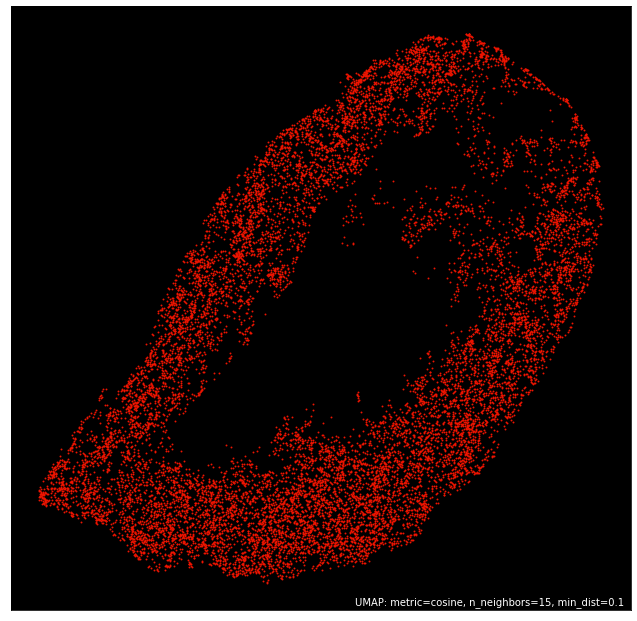

In [20]:
%matplotlib inline
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, theme='fire');
plt.savefig("plots/umap_soc_nat.png")

In [21]:
app_escuela = pd.read_csv("app_escuela.csv")

In [22]:
app_escuela.columns

Index(['id', 'ambito', 'gestion', 'icse', 'icse_cat',
       'indice_socioeconomico_medio', 'indice_socioeconomico_medio_cat',
       'tecnica', 'tiene_internet', 'subvencion', 'dependencia',
       'departamento_id', 'provincia_id'],
      dtype='object')

In [26]:
aux = total.merge(escuelas, left_on="escuela_id", right_on="id")

In [28]:
aux.columns

Index(['escuela_id', 'avanzado_cs_sc', 'satisfactorio_cs_sc', 'basico_cs_sc',
       'por_debajo_del_basico_cs_sc', 'avanzado_cs_nat',
       'satisfactorio_cs_nat', 'basico_cs_nat', 'por_debajo_del_basico_cs_nat',
       'id', 'ambito', 'gestion', 'icse', 'icse_cat',
       'indice_socioeconomico_medio', 'indice_socioeconomico_medio_cat',
       'tecnica', 'tiene_internet', 'subvencion', 'dependencia',
       'departamento_id', 'provincia_id'],
      dtype='object')

No handles with labels found to put in legend.


<Figure size 1200x800 with 0 Axes>

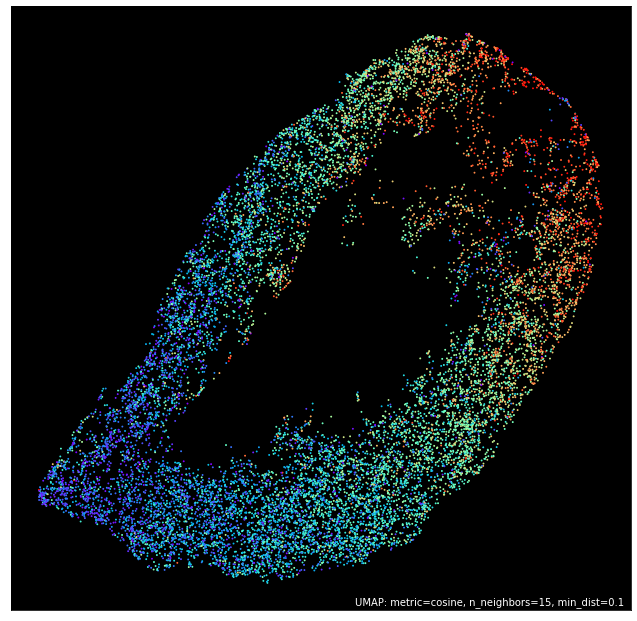

In [29]:
%matplotlib inline
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["indice_socioeconomico_medio"].values, theme='fire');
plt.legend().set_visible(False)
plt.savefig("plots/umap_soc_nat_indice_socioeconomico_medio.png")

<Figure size 1200x800 with 0 Axes>

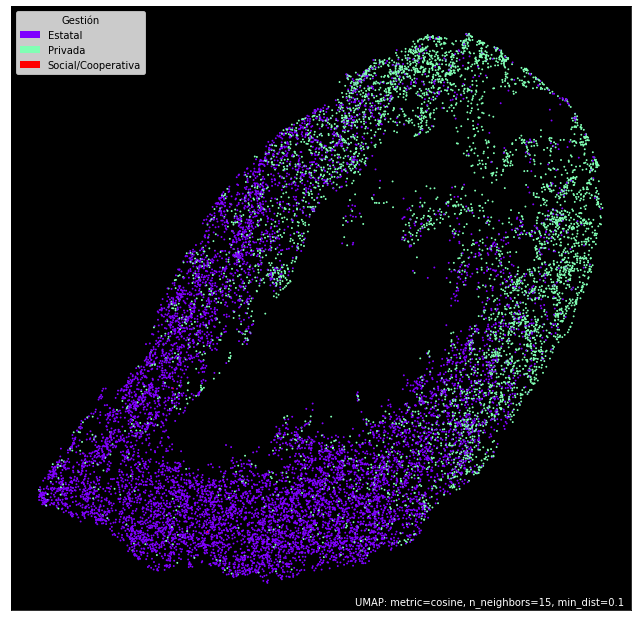

In [30]:
%matplotlib inline
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["gestion"].values, theme='fire');
leg = plt.gca().get_legend()
leg.set_title("Gestión")
LABELS = {"estatal": "Estatal", "privada": "Privada", "social/cooperativa": "Social/Cooperativa"}
for t in leg.texts: t.set_text(LABELS[t.get_text()])
plt.savefig("plots/umap_soc_nat_gestion.png")

<Figure size 1200x800 with 0 Axes>

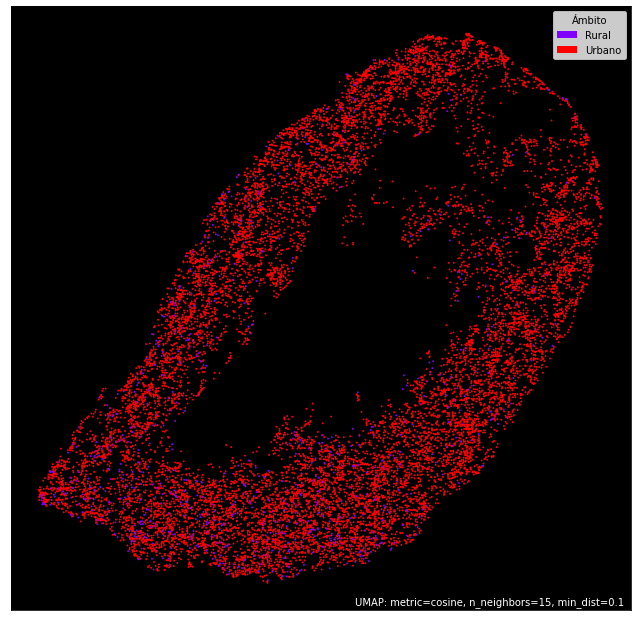

In [31]:
%matplotlib inline
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["ambito"].values, theme='fire');
leg = plt.gca().get_legend()
leg.set_title("Ámbito")
LABELS = {"rural": "Rural", "urbano": "Urbano"}
for t in leg.texts: t.set_text(LABELS[t.get_text()])
plt.savefig("plots/umap_soc_nat_ambito.png")

<Figure size 1200x800 with 0 Axes>

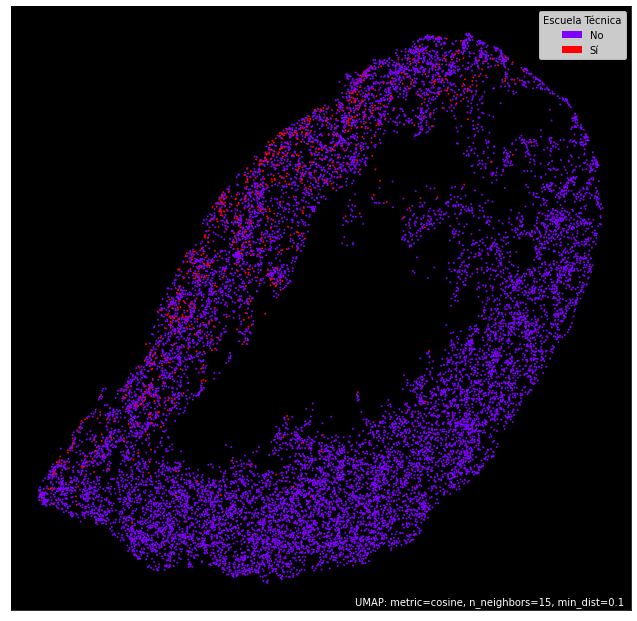

In [32]:
%matplotlib inline
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["tecnica"].values, theme='fire');
leg = plt.gca().get_legend()
leg.set_title("Escuela Técnica")
LABELS = {"t": "Sí", "f": "No"}
for t in leg.texts: t.set_text(LABELS[t.get_text()])
plt.savefig("plots/umap_soc_nat_escuelas_tecnicas.png")

No handles with labels found to put in legend.


<Figure size 1200x800 with 0 Axes>

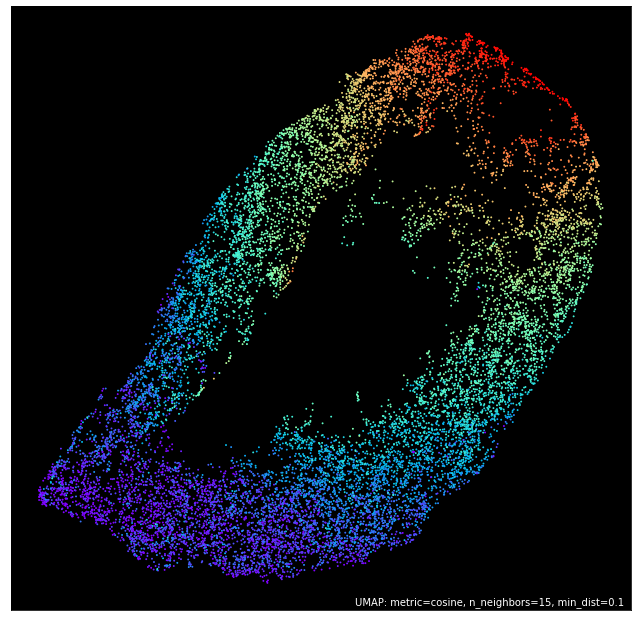

In [33]:
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["avanzado_cs_sc"].values, theme='fire')
plt.legend().set_visible(False)
plt.savefig("plots/umap_avanzado_cs_sc.png")

No handles with labels found to put in legend.


<Figure size 1200x800 with 0 Axes>

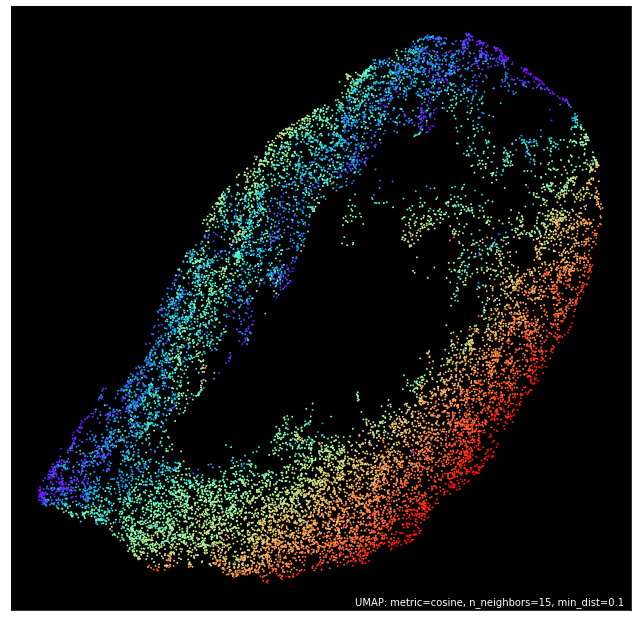

In [34]:
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["satisfactorio_cs_sc"].values, theme='fire')
plt.legend().set_visible(False)
plt.savefig("plots/umap_satisfactorio_cs_sc.png")

No handles with labels found to put in legend.


<Figure size 1200x800 with 0 Axes>

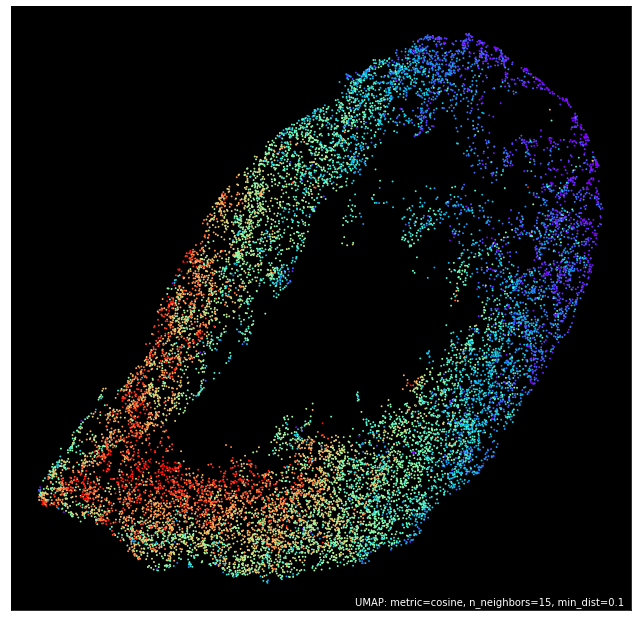

In [35]:
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["basico_cs_sc"].values, theme='fire')
plt.legend().set_visible(False)
plt.savefig("plots/umap_basico_cs_sc.png")

No handles with labels found to put in legend.


<Figure size 1200x800 with 0 Axes>

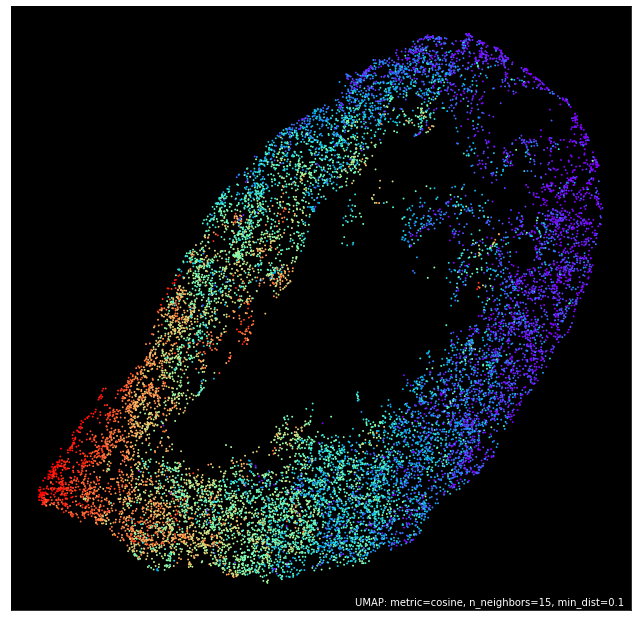

In [36]:
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["por_debajo_del_basico_cs_sc"].values, theme='fire')
plt.legend().set_visible(False)
plt.savefig("plots/umap_por_debajo_del_basico_cs_sc.png")

No handles with labels found to put in legend.


<Figure size 1200x800 with 0 Axes>

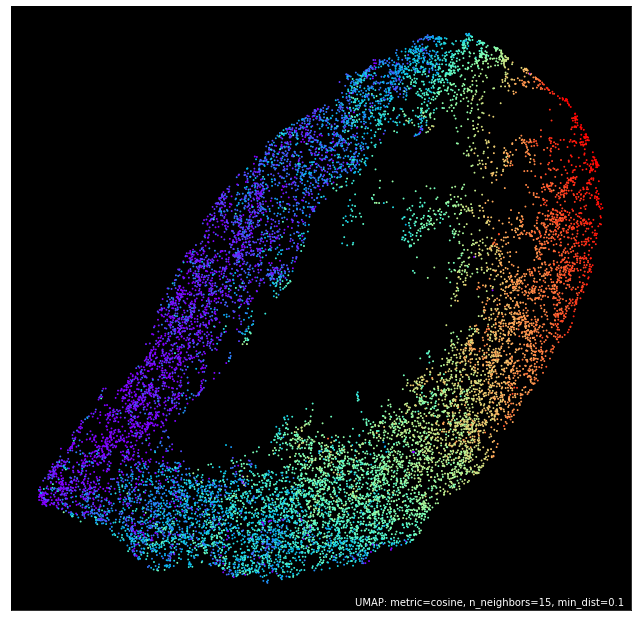

In [37]:
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["avanzado_cs_nat"].values, theme='fire')
plt.legend().set_visible(False)
plt.savefig("plots/umap_avanzado_cs_nat.png")

No handles with labels found to put in legend.


<Figure size 1200x800 with 0 Axes>

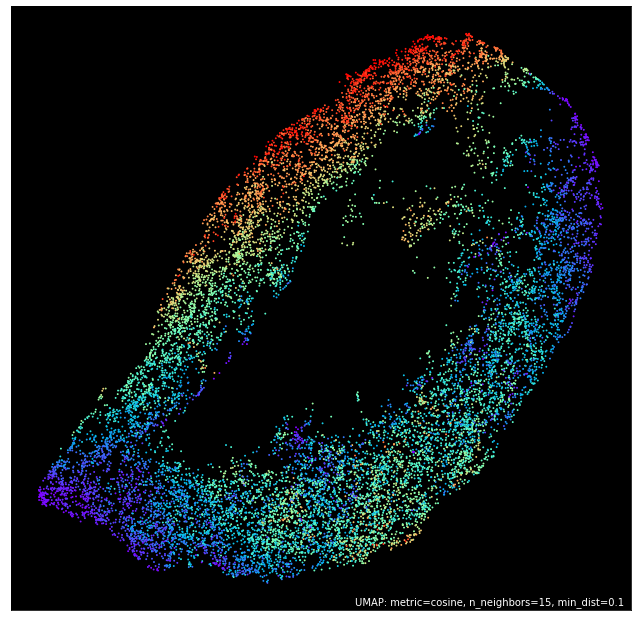

In [38]:
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["satisfactorio_cs_nat"].values, theme='fire')
plt.legend().set_visible(False)
plt.savefig("plots/umap_satisfactorio_cs_nat.png")

No handles with labels found to put in legend.


<Figure size 1200x800 with 0 Axes>

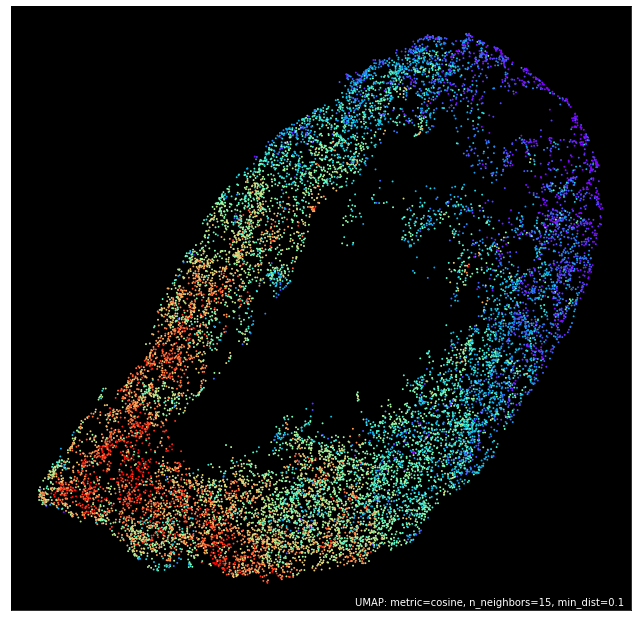

In [39]:
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["basico_cs_nat"].values, theme='fire')
plt.legend().set_visible(False)
plt.savefig("plots/umap_basico_cs_nat.png")

No handles with labels found to put in legend.


<Figure size 1200x800 with 0 Axes>

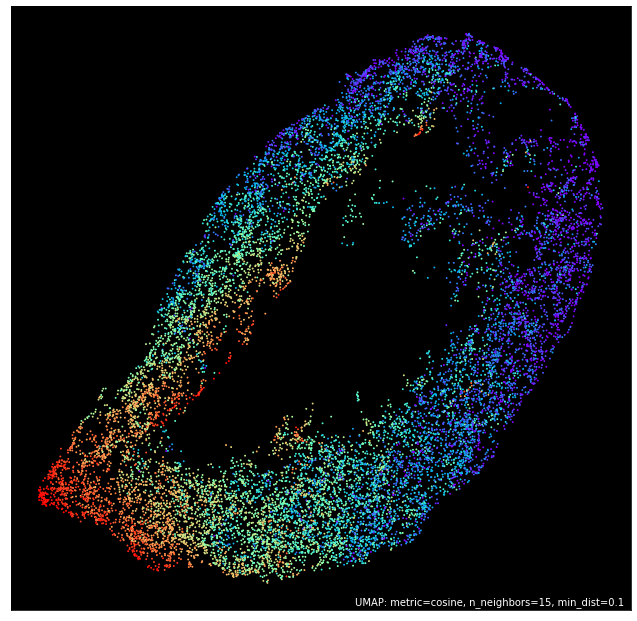

In [40]:
plt.figure(dpi=200)
umap_plot = umap.plot.points(low_dimension, labels=aux["por_debajo_del_basico_cs_nat"].values, theme='fire')
plt.legend().set_visible(False)
plt.savefig("plots/umap_por_debajo_del_basico_cs_nat.png")